In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setup data

data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [4]:
# Labels are values 0-9, represents an index in this array

print(np.unique(train_labels))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

[0 1 2 3 4 5 6 7 8 9]


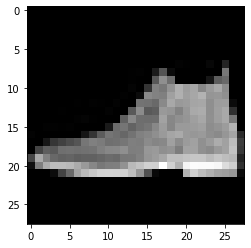

In [8]:
# Shows random image from dataset

def show_image(img):
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.grid(False)
    plt.show()
    
show_image(test_images[0])

In [9]:
# Rescales the data

train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
# Creates the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=train_images[0].shape),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Trains the model

model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4997 - accuracy: 0.8246
Epoch 2/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3715 - accuracy: 0.8663s - loss: 0.3725 - accu
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3339 - accuracy: 0.8776s
Epoch 4/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3125 - accuracy: 0.8844
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2956 - accuracy: 0.8920
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2804 - accuracy: 0.8966
Epoch 7/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2670 - accuracy: 0.9018
Epoch 8/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2562 - accuracy: 0.9051
Epoch 9/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2453 - accur

In [12]:
# Testing the model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2497 - accuracy: 0.8786

Test accuracy: 0.8786


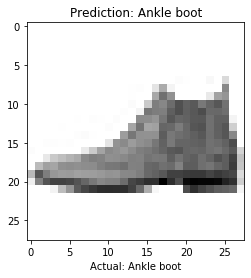

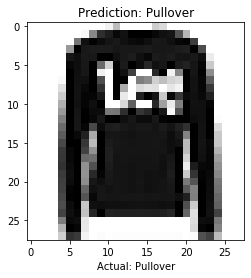

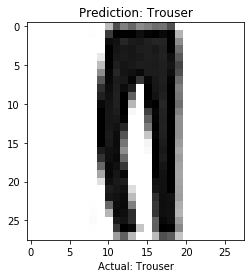

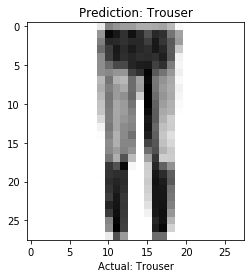

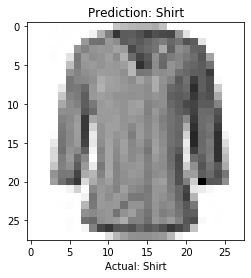

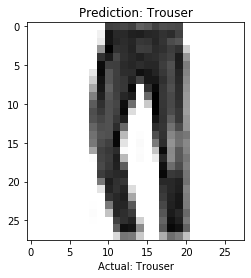

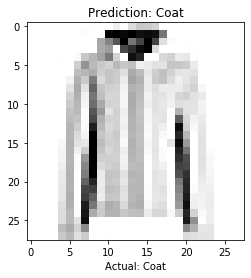

In [17]:
# Makes predictions on single images

def get_predictions(images):
    return [np.argmax(a) for a in model.predict(images)]


predictions = get_predictions(test_images)

for i in range(7):
    plt.imshow(test_images[i], cmap='gist_gray_r')
    plt.title('Prediction: ' + class_names[predictions[i]])
    plt.xlabel('Actual: ' + class_names[test_labels[i]])
    plt.show()